In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def velocity_pipe_flow_power_law(radius, n, v_0=1):
    return v_0 * (1 - (radius) ** ((n + 1) / n))

def velocity_pipe_flow_newtonian(radius, v_0=1):
    return v_0 * (1 - (radius)**2)

def v_0_power_law(v_0_newton, nn):
    return v_0_newton * 2/3 * (2*nn +1 )/(nn + 1)

### Velocity profile Newtonian pipe flow

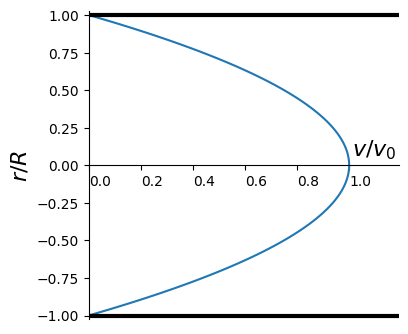

In [32]:
radius = np.linspace(-1, 1, num=100) # normalization of r to R

fig, ax = plt.subplots(1, figsize=(4,4))
fontsize=16
lw = 1.5

ax.plot(velocity_pipe_flow_newtonian(radius), radius, c='C0', linewidth=lw, label='Newtonian fluid')
ax.axhline(1, color='k', lw=3)
ax.axhline(-1, color='k', lw=3)

ax.set_xlim(0, 1.19)
ax.set_ylim(-1.025, 1.025)
ax.set_xlabel(r"$v/v_0$", fontsize=fontsize)
ax.xaxis.set_label_coords(0.92, 0.59)
ax.set_ylabel(r"$r/R$", fontsize=fontsize)
ax.spines['bottom'].set_position('center')
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.grid(which='major', zorder=0)
#plt.gca().invert_xaxis()

# plt.tight_layout()
savename = "plots//velocity_profile_hagen_poiseuille"
fig.savefig(savename+".pdf", bbox_inches='tight',dpi=900)
fig.savefig(savename+".png", bbox_inches='tight', dpi=900)

plt.show()

### Velocity profile power law vs Newtonian

In [21]:
channel_radius= 10
radius = np.linspace(-1, 1, num=100) # normalization of r to R
n = 0.5
v_0_shear_thinning = v_0_power_law(1, n)

In [28]:
fig, ax = plt.subplots(1, figsize=(4,4))

fontsize=16
lw = 1.5
alpha = 0.3

ax.plot(velocity_pipe_flow_newtonian(radius), radius, linewidth=lw, label='Newtonian liquid')
ax.fill_betweenx(radius, velocity_pipe_flow_newtonian(radius),
                 alpha=alpha,
                 # label='Newtonian fluid'
                 )
ax.plot(velocity_pipe_flow_power_law(radius, n, v_0=v_0_shear_thinning), radius, linewidth=lw, label='Power law liquid')
ax.fill_betweenx(radius, velocity_pipe_flow_power_law(radius, n, v_0=v_0_shear_thinning),
                 alpha=alpha,
                 ls='-', linewidth=2.0,
                 # label='Power law fluid'
                 )
ax.axhline(1, color='k', lw=3)

ax.set_xlabel(r"$v/v_0$", fontsize=fontsize)
ax.set_ylabel(r"$r/R$", fontsize=fontsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0, 1.025)
ax.set_ylim(0, 1.025)
ax.text(0.7, 0.7, r"$n=0.5$", color='C1', fontsize=14)
# ax.grid(which='major', zorder=0)
ax.legend()
#plt.gca().invert_xaxis()

# plt.tight_layout()
savename = "plots//velocity_profile_power_law"
fig.savefig(savename+".pdf", bbox_inches='tight',dpi=900)
fig.savefig(savename+".png", bbox_inches='tight', dpi=900)

plt.show()

#### Plot shear rate over radius

In [29]:
def shear_rate_pipe_flow_power_law(radius, n, r_channel, v_0=1):
    return v_0 / r_channel * (n+1)/n * radius**(1 / n)

def shear_rate_pipe_flow_newtonian(radius, r_channel, v_0=1):
    return v_0 / r_channel * radius

In [30]:
channel_radius= 10
radius = np.linspace(0, 1, num=100) # normalization of r to R
n = 0.5
v_0_shear_thinning = v_0_power_law(1, n)
wall_shear_newton = 1 /channel_radius

shear_rates_newton_normalized = shear_rate_pipe_flow_newtonian(radius, channel_radius) \
                                / wall_shear_newton
shear_rates_pl_normalized = shear_rate_pipe_flow_power_law(radius, n, channel_radius, v_0=v_0_shear_thinning)  \
                            / wall_shear_newton

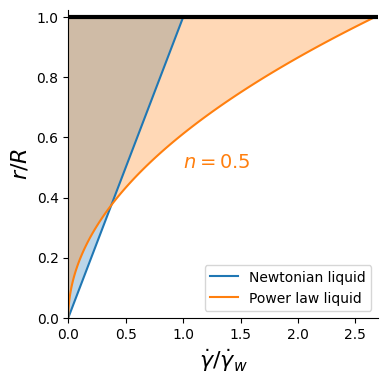

In [31]:
fig, ax = plt.subplots(1, figsize=(4,4))

fontsize=16
lw = 1.5
alpha = 0.3

ax.plot(shear_rates_newton_normalized, radius, linewidth=lw, label='Newtonian liquid')
ax.fill_betweenx(radius, shear_rates_newton_normalized,
                 alpha=alpha,
                 # label='Newtonian fluid'
                 )
ax.plot(shear_rates_pl_normalized, radius, linewidth=lw, label='Power law liquid')
ax.fill_betweenx(radius, shear_rates_pl_normalized,
                 alpha=alpha,
                 ls='-', linewidth=2.0,
                 # label='Power law fluid'
                 )
ax.axhline(1, color='k', lw=3)

ax.set_xlabel(r"$\dot\gamma/\dot\gamma_w$", fontsize=fontsize)
ax.set_ylabel(r"$r/R$", fontsize=fontsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0, 2.7)
ax.set_ylim(0, 1.025)
ax.text(1.0, 0.5, r"$n={}$".format(n), color='C1', fontsize=14)
# ax.grid(which='major', zorder=0)
ax.legend()
#plt.gca().invert_xaxis()

# plt.tight_layout()
savename = "plots//shear_rate_profile_power_law"
fig.savefig(savename+".pdf", bbox_inches='tight',dpi=900)
fig.savefig(savename+".png", bbox_inches='tight', dpi=900)

plt.show()